## **ETH Price Prediction using Machine Learning (SVR)**
---
Conditions:
*   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

### 1. Libraries

In [12]:
#Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 2. Download the data from yahoofinance or CSV file

In [ ]:
# a) Load the data from csv file
#from google.colab import files
#files.upload()

In [2]:
# b) Load the data from yahoofinance
df = yf.download("ETH-USD", start="2019-08-12", end="2021-05-11", interval = '1d')
#Set the data as the index
df.index.name = None
df['Date'] = df.index
#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
2019-08-11,206.732239,216.598648,206.510803,216.092865,216.092865,6440605605,2019-08-11
2019-08-12,216.055908,216.142563,210.946487,211.288071,211.288071,5674315559,2019-08-12
2019-08-13,211.342697,211.384415,205.422501,208.709045,208.709045,5946313205,2019-08-13
2019-08-14,208.603989,209.066437,186.331924,186.607742,186.607742,7444456154,2019-08-14
2019-08-15,186.683502,189.462158,178.142563,188.502060,188.502060,8197244441,2019-08-15


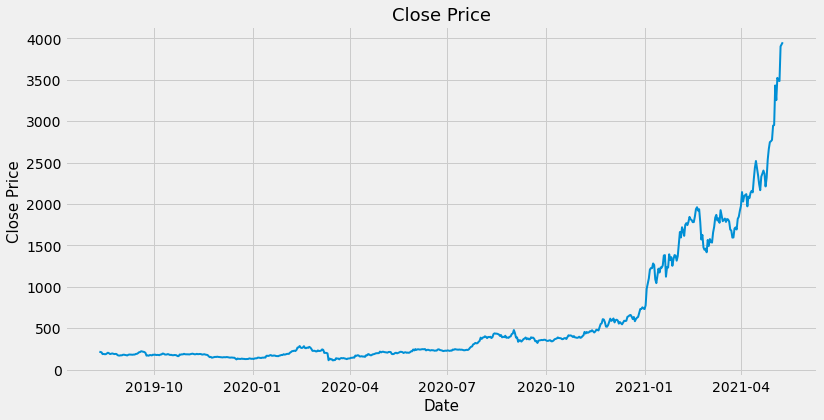

In [20]:
#Visually show and plot the close price
plt.figure(figsize=(12,6))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'],linewidth=2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.show()

### 3. Support Vector Regression

In [3]:
#Create a variable for predicting 'n' days  into the future
future_days = 5

In [6]:
#Create a new column 
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
#Show the data
df[['Close',str(future_days) + '_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2019-08-11,216.092865,185.440079
2019-08-12,211.288071,185.687683
2019-08-13,208.709045,194.493530
2019-08-14,186.607742,203.091934
2019-08-15,188.502060,196.565414
...,...,...
2021-05-06,3490.880371,NaN
2021-05-07,3484.729004,NaN
2021-05-08,3902.647705,NaN
2021-05-09,3928.844727,NaN


In [9]:
#Set up the data
X = np.array(df[['Close']])
X = X[:df.shape[0]-future_days]
#print(X)

In [11]:
#Set up the data
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])
y = y[:-future_days]
#print(y)

In [13]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [14]:
#SVR Support Vector Machines
#C - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [15]:
#Test the model using score
svr_rbf_confidence = svr_rbf.score(X_test, y_test)
#The highest possible score = 1
print('svr_rbf confidence:', svr_rbf_confidence)

svr_rbf confidence: 0.9859558234853009


In [16]:
#Print the SVM models prediction
svm_prediction = svr_rbf.predict(X_test)
print(svm_prediction)


[ 467.74530858 1984.50712734  399.89325208  578.10208115 1725.64886567
 1779.71371453  603.877685    147.0618325   226.00065853  434.38612984
  390.50872241 1811.96511177  234.74769783  180.83786624  647.59251752
  243.07933302 1446.15508858  227.53071808 3482.35512541 1823.40633371
  186.74574536  140.02554791  558.75041214  154.94214617  184.84634796
  185.75263965  191.26137381  459.62098439  189.19032135  577.02085471
  208.31321795  191.58134142  168.73847301  246.52924654  179.47694562
  208.32470339  185.22726242  363.71790129  244.39976942  223.24695314
 1791.10916613  196.85248478 1776.62898917  639.21431838  242.44143874
  171.91281513 1804.04068143 1606.33379604  249.50905143  172.04774671
  269.61786129  176.02585055  399.93935564  237.72936635 3261.80193674
  355.12842768  392.74920399  185.1762634   381.5533228   214.72547135
  887.46574803 1783.51894532  404.94777941  362.30540912 1785.28402753
  188.09230012  222.32706602 1794.09209033  186.62416535 1246.83570948
  183.

In [17]:
#Actual value
print(y_test)

[ 603.89776611 2118.37890625  382.63262939  573.47912598 1868.04882812
 1805.08410645  601.90899658  145.87393188  268.09924316  335.2600708
  394.96194458 1817.62414551  241.22198486  180.8266449   596.59545898
  236.15316772 1594.76269531  201.98632812 3490.88037109 1854.56433105
  172.9130249   143.54664612  589.66320801  151.71757507  150.26817322
  177.45555115  169.51673889  459.94030762  207.15869141  642.86895752
  207.16918945  185.48963928  175.9928894   239.45817566  183.96691895
  208.86343384  183.34835815  353.2059021   235.48381042  244.17932129
 2028.42248535  186.84239197 1843.53259277  635.83581543  112.34712219
  172.73770142 1848.45825195 1541.91430664  246.30990601  195.51530457
  226.75338745  188.61753845  433.35491943  245.01672363 3253.62939453
  341.80865479  368.85592651  186.89163208  366.22900391  199.19328308
  975.50769043 1918.36206055  395.88757324  370.96759033 1746.61682129
  180.55960083  229.26818848 1806.97180176  185.11923218 1043.43457031
  183.9

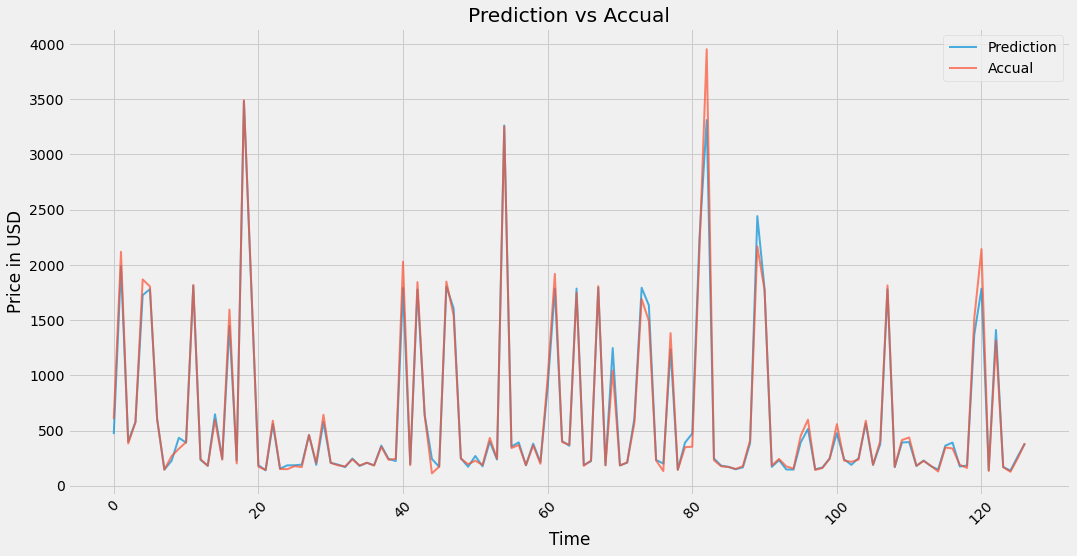

In [19]:
plt.figure(figsize=(16,8))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=0.7)
plt.plot(y_test, label='Accual', lw=2, alpha=0.7)
plt.title('Prediction vs Accual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

